In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv("insurance.csv")

In [51]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [53]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [54]:
df.isnull().sum() #No missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [55]:
df.duplicated().sum() #There is one duplicate value

1

In [56]:
df.drop_duplicates(inplace=True)

In [57]:
df.reset_index(inplace=True)

In [58]:
df.duplicated().sum() #duplicated removed

0

In [59]:
df

,index,age,sex,bmi,children,smoker,region,expenses
0,0,19,female,27.9,0,yes,southwest,16884.92
1,1,18,male,33.8,1,no,southeast,1725.55
2,2,28,male,33.0,3,no,southeast,4449.46
3,3,33,male,22.7,0,no,northwest,21984.47
4,4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...,...
1332,1333,50,male,31.0,3,no,northwest,10600.55
1333,1334,18,female,31.9,0,no,northeast,2205.98
1334,1335,18,female,36.9,0,no,southeast,1629.83
1335,1336,21,female,25.8,0,no,southwest,2007.95


In [60]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
encode = OneHotEncoder()

In [62]:
encoded_array = encode.fit_transform(df[["sex","smoker","region"]]).toarray()

In [63]:
encode.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [64]:
encoded_categories = encode.categories_

In [65]:
encoded_categories_array = np.array(encoded_categories).flatten()

/tmp/ipykernel_209381/2550657508.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  encoded_categories_array = np.array(encoded_categories).flatten()


In [66]:
ohe_df = pd.DataFrame(encoded_array,columns=["female","male","no","yes","northeast","northwest","southeast","southwest"])

In [67]:
ohe_df

,female,male,no,yes,northeast,northwest,southeast,southwest
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1332,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1333,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1334,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1335,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [68]:
df

,index,age,sex,bmi,children,smoker,region,expenses
0,0,19,female,27.9,0,yes,southwest,16884.92
1,1,18,male,33.8,1,no,southeast,1725.55
2,2,28,male,33.0,3,no,southeast,4449.46
3,3,33,male,22.7,0,no,northwest,21984.47
4,4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...,...
1332,1333,50,male,31.0,3,no,northwest,10600.55
1333,1334,18,female,31.9,0,no,northeast,2205.98
1334,1335,18,female,36.9,0,no,southeast,1629.83
1335,1336,21,female,25.8,0,no,southwest,2007.95


In [69]:
final_df = pd.concat([df,ohe_df],axis=1)

In [70]:
final_df

,index,age,sex,bmi,children,smoker,region,expenses,female,male,no,yes,northeast,northwest,southeast,southwest
0,0,19,female,27.9,0,yes,southwest,16884.92,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,18,male,33.8,1,no,southeast,1725.55,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,28,male,33.0,3,no,southeast,4449.46,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,33,male,22.7,0,no,northwest,21984.47,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,4,32,male,28.9,0,no,northwest,3866.86,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,1333,50,male,31.0,3,no,northwest,10600.55,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1333,1334,18,female,31.9,0,no,northeast,2205.98,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1334,1335,18,female,36.9,0,no,southeast,1629.83,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1335,1336,21,female,25.8,0,no,southwest,2007.95,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [71]:
final_df.isnull().sum()

index        0
age          0
sex          0
bmi          0
children     0
smoker       0
region       0
expenses     0
female       0
male         0
no           0
yes          0
northeast    0
northwest    0
southeast    0
southwest    0
dtype: int64

In [72]:
final_df

,index,age,sex,bmi,children,smoker,region,expenses,female,male,no,yes,northeast,northwest,southeast,southwest
0,0,19,female,27.9,0,yes,southwest,16884.92,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,18,male,33.8,1,no,southeast,1725.55,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,28,male,33.0,3,no,southeast,4449.46,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,33,male,22.7,0,no,northwest,21984.47,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,4,32,male,28.9,0,no,northwest,3866.86,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,1333,50,male,31.0,3,no,northwest,10600.55,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1333,1334,18,female,31.9,0,no,northeast,2205.98,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1334,1335,18,female,36.9,0,no,southeast,1629.83,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1335,1336,21,female,25.8,0,no,southwest,2007.95,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [74]:
final_df.drop(["female","no","northeast","smoker","region","sex","index"],axis=1,inplace=True)

In [75]:
final_df

,age,bmi,children,expenses,male,yes,northwest,southeast,southwest
0,19,27.9,0,16884.92,0.0,1.0,0.0,0.0,1.0
1,18,33.8,1,1725.55,1.0,0.0,0.0,1.0,0.0
2,28,33.0,3,4449.46,1.0,0.0,0.0,1.0,0.0
3,33,22.7,0,21984.47,1.0,0.0,1.0,0.0,0.0
4,32,28.9,0,3866.86,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1332,50,31.0,3,10600.55,1.0,0.0,1.0,0.0,0.0
1333,18,31.9,0,2205.98,0.0,0.0,0.0,0.0,0.0
1334,18,36.9,0,1629.83,0.0,0.0,0.0,1.0,0.0
1335,21,25.8,0,2007.95,0.0,0.0,0.0,0.0,1.0


In [76]:
final_df.corr()

,age,bmi,children,expenses,male,yes,northwest,southeast,southwest
age,1.000000,0.109414,0.041536,0.298308,-0.019814,-0.025587,0.001495,-0.012311,0.009415
bmi,0.109414,1.000000,0.012641,0.198637,0.046405,0.003964,-0.136137,0.270177,-0.006403
children,0.041536,0.012641,1.000000,0.067389,0.017848,0.007331,0.026044,-0.023492,0.021538
expenses,0.298308,0.198637,0.067389,1.000000,0.058045,0.787234,-0.038695,0.073578,-0.043637
male,-0.019814,0.046405,0.017848,0.058045,1.000000,0.076596,-0.012482,0.017578,-0.003767
yes,-0.025587,0.003964,0.007331,0.787234,0.076596,1.000000,-0.036321,0.068282,-0.037168
northwest,0.001495,-0.136137,0.026044,-0.038695,-0.012482,-0.036321,1.000000,-0.345909,-0.320493
southeast,-0.012311,0.270177,-0.023492,0.073578,0.017578,0.068282,-0.345909,1.000000,-0.346614
southwest,0.009415,-0.006403,0.021538,-0.043637,-0.003767,-0.037168,-0.320493,-0.346614,1.000000


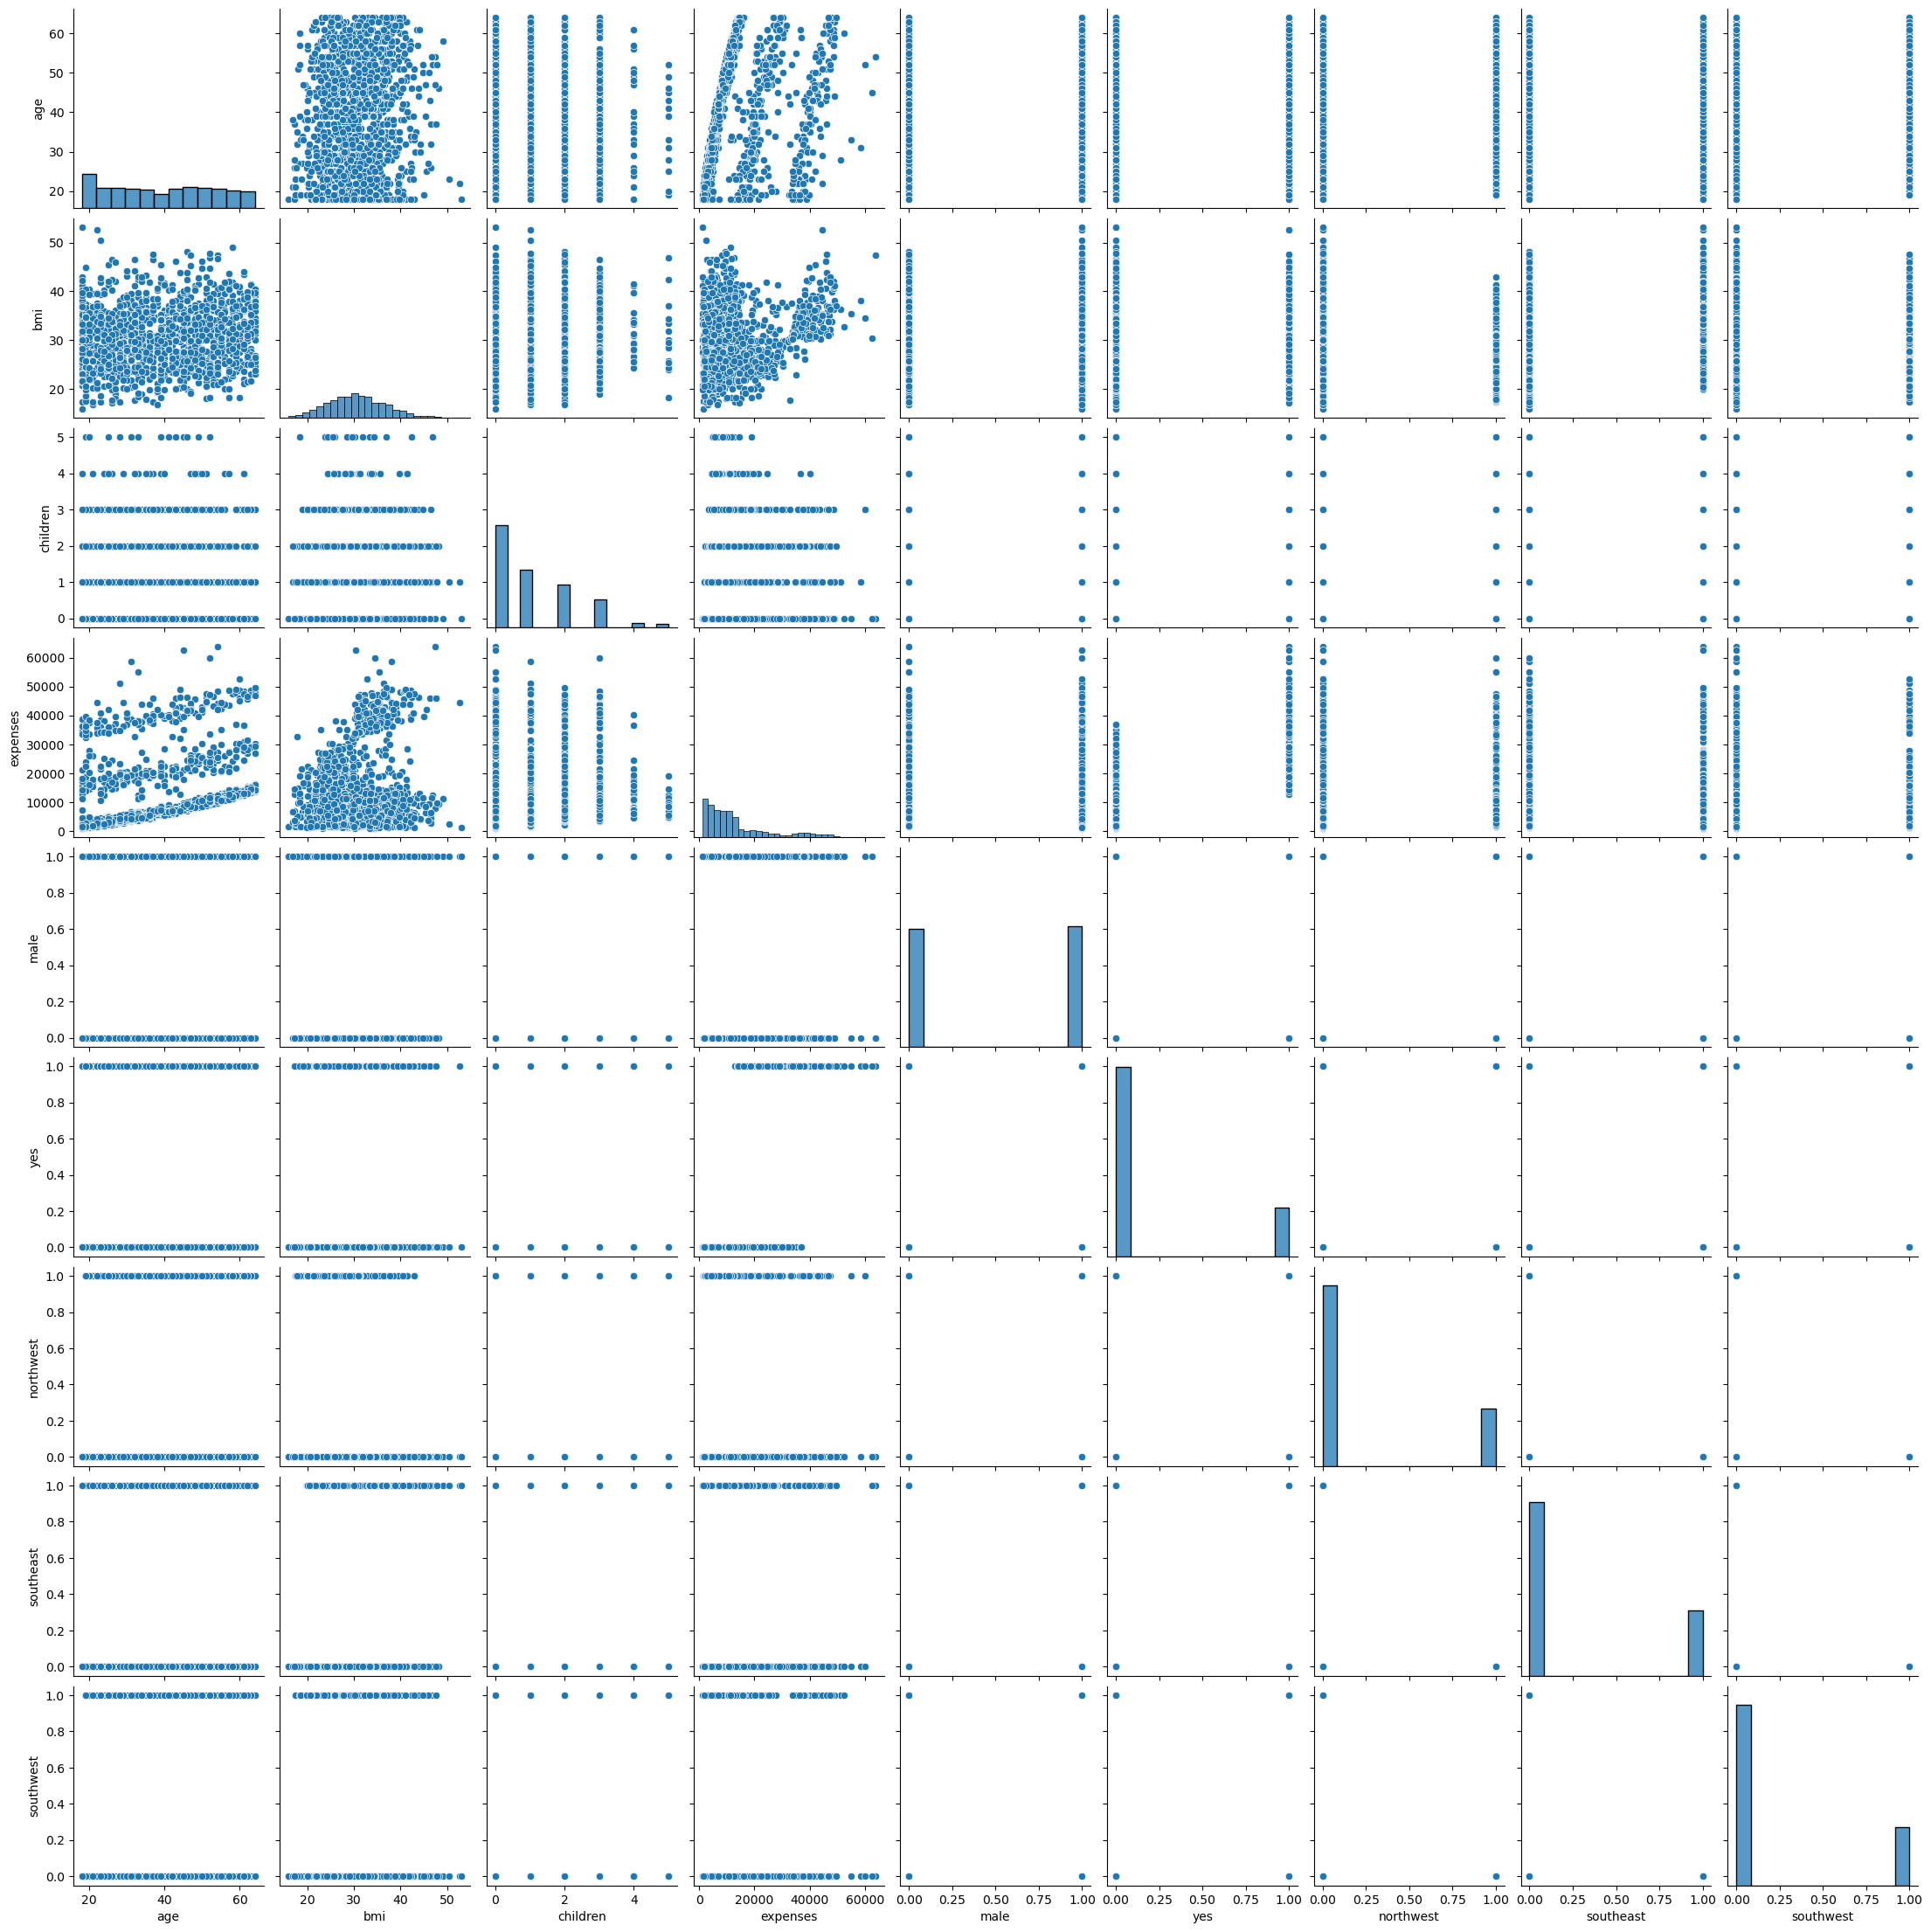

In [81]:
sns.pairplot(final_df)

Text(0, 0.5, 'Price')

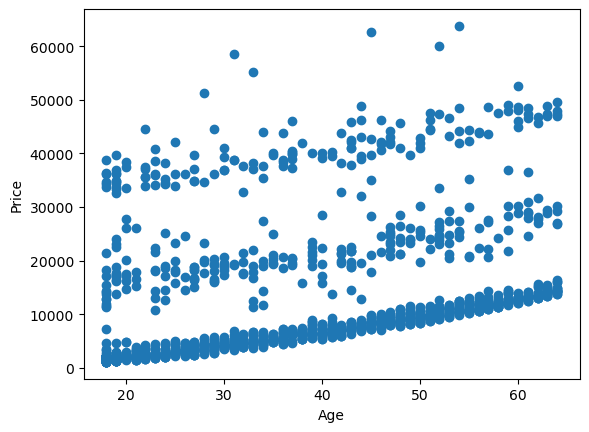

In [91]:
plt.scatter(final_df["age"],final_df["expenses"])
plt.xlabel("Age")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

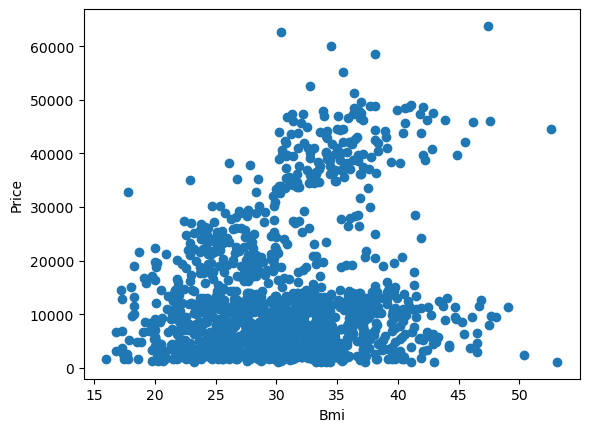

In [92]:
plt.scatter(final_df["bmi"],final_df["expenses"])
plt.xlabel("Bmi")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

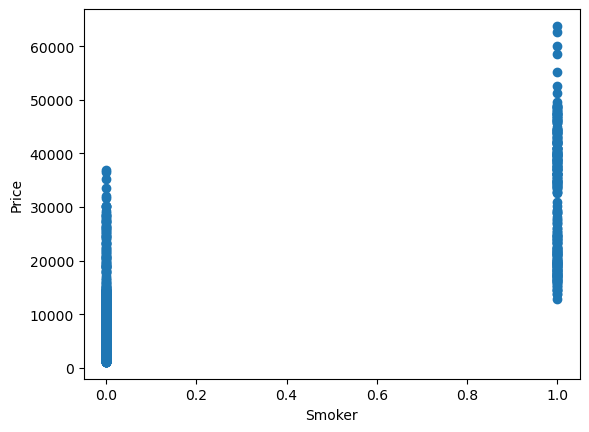

In [93]:
plt.scatter(final_df["yes"],final_df["expenses"])
plt.xlabel("Smoker")
plt.ylabel("Price")

<Axes: xlabel='age', ylabel='expenses'>

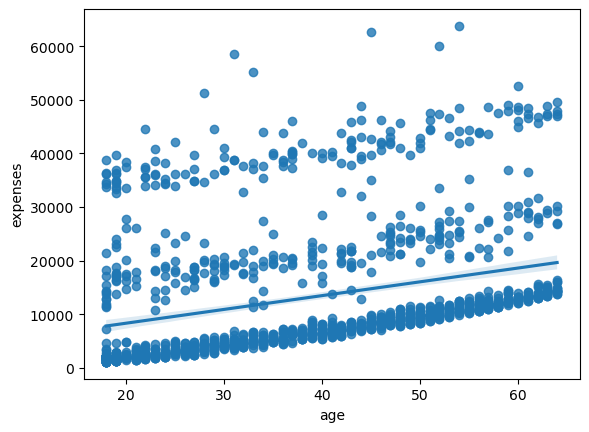

In [95]:
sns.regplot(x="age",y="expenses",data=final_df)

<Axes: xlabel='bmi', ylabel='expenses'>

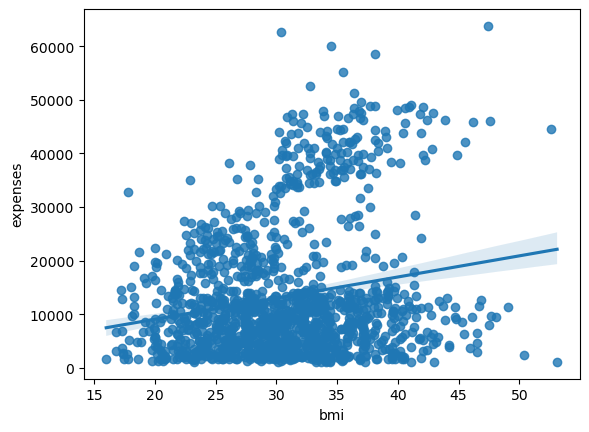

In [96]:
sns.regplot(x="bmi",y="expenses",data=final_df)

<Axes: xlabel='yes', ylabel='expenses'>

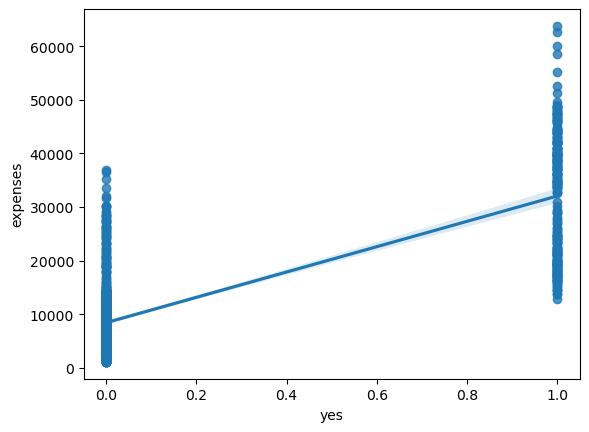

In [97]:
sns.regplot(x="yes",y="expenses",data=final_df)

<Axes: xlabel='children', ylabel='expenses'>

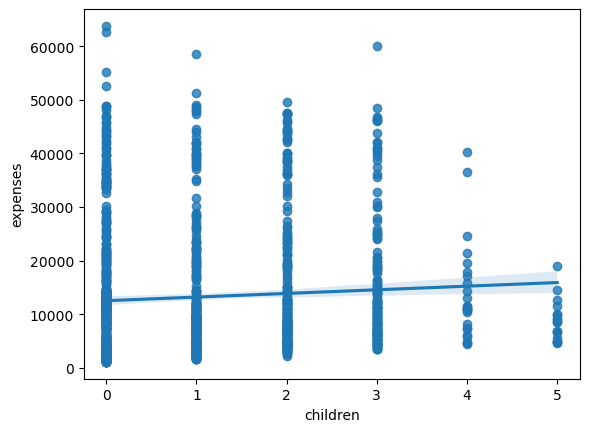

In [98]:
sns.regplot(x="children",y="expenses",data=final_df)

In [99]:
X = final_df.iloc[:,[0,1,5]]
y = final_df["expenses"]

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [131]:
from sklearn.ensemble import GradientBoostingRegressor

In [132]:
parametersGB = {
    "loss": ["squared_error", "absolute_error", "huber", "quantile"],
    "learning_rate": [0.1,0.2,0.3,1,2,3],
    "n_estimators" : [50,100,200,300,400],
    "criterion": ["friedman_mse", "squared_error"],
    "max_depth" : [1,2,3,4,5],
    "max_features": ["sqrt", "log2"]
    
}

In [133]:
gb = GradientBoostingRegressor()

In [134]:
from sklearn.model_selection import GridSearchCV

In [135]:
cvGB = GridSearchCV(gb,param_grid=parametersGB,scoring="neg_mean_squared_error",cv=5)

In [136]:
cvGB.fit(X_train,y_train)

/home/samarth/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_search.py:961: RuntimeWarning: overflow encountered in square
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.2, 0.3, 1, 2, 3],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 300, 400]},
             scoring='neg_mean_squared_error')

In [137]:
cvGB.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 2,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [138]:
from sklearn.metrics import r2_score

In [139]:
y_pred_train = cvGB.predict(X_train)

In [140]:
r2_score(y_train,y_pred_train)

0.861888779161285

In [141]:
y_pred_test = cvGB.predict(X_test)

In [142]:
r2_score(y_test,y_pred_test)

0.902095029825285

In [143]:
import pickle

In [144]:
pickle.dump(cvGB,open("insuranceModel.pkl","wb"))